<a href="https://colab.research.google.com/github/pradyumna4998/Intro-to-ML/blob/main/Intro_to_ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            Introduction to Machine Learning
                                   HomeWork 3
  Name : V.pradyumna

  Student ID : 801345963


  



# New Section

# New Section

Problem 1

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score,average_precision_score, log_loss
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [ ]:
url = 'https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/diabetes.csv'
data_frame = pd.read_csv(url)

# Displaying the first 5 rows of the DataFrame
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(data_frame.shape)

(768, 9)


In [ ]:
print(data_frame.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(data_frame.describe)

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [ ]:
print(data_frame.dtypes)
print(data_frame.isnull().sum())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
X = data_frame.loc[:, data_frame.columns != 'Outcome']
y = data_frame.loc[:, 'Outcome']

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
import random
random.seed(9)
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X,
                                                   y,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train_set.shape, X_test_set.shape, y_train_set.shape, y_test_set.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
X_train_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10,162,84,0,0,27.7,0.182,54
69,4,146,85,27,100,28.9,0.189,27
85,2,110,74,29,125,32.4,0.698,27
219,5,112,66,0,0,37.8,0.261,41
712,10,129,62,36,0,41.2,0.441,38


In [ ]:
scaler= StandardScaler()
scaler.fit(X_train_set)
X_train_scaler = scaler.transform(X_train_set) # standardization of dependent variables
X_train_scaler.shape

(614, 8)

In [ ]:


model = LogisticRegression()

model.fit(X_train_scaler, y_train_set)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.34793889,  1.1672818 , -0.20092548, -0.0538404 , -0.0883781 ,
         0.75212144,  0.42169378,  0.24350804]])

Training score

In [ ]:
model.score(X_train_scaler, y_train_set)

0.7915309446254072

In [ ]:
X_test_scaler = scaler.transform(X_test_set)
y_predicted = model.predict(X_test_scaler)

In [ ]:
confuse_matrix = confusion_matrix(y_test_set, y_predicted)
confuse_matrix

array([[86, 15],
       [26, 27]])

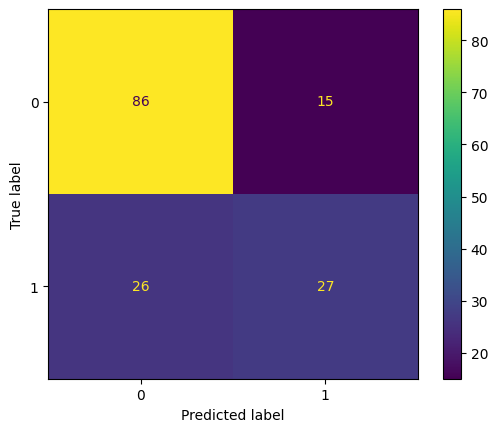

In [ ]:
displaying = ConfusionMatrixDisplay(confusion_matrix = confuse_matrix,
                             display_labels = model.classes_)
displaying.plot()

In [ ]:
metrics = [accuracy_score, precision_score, recall_score, f1_score]
results = {}

for metric in metrics:
    result = metric(y_test_set, y_predicted)
    results[metric.__name__] = result

print(results)

{'accuracy_score': 0.7337662337662337, 'precision_score': 0.6428571428571429, 'recall_score': 0.5094339622641509, 'f1_score': 0.568421052631579}


In [ ]:
probabilities = model.predict_proba(X_test_scaler)
precision, recall,  thersholds = precision_recall_curve(y_test_set, probabilities[:,1])

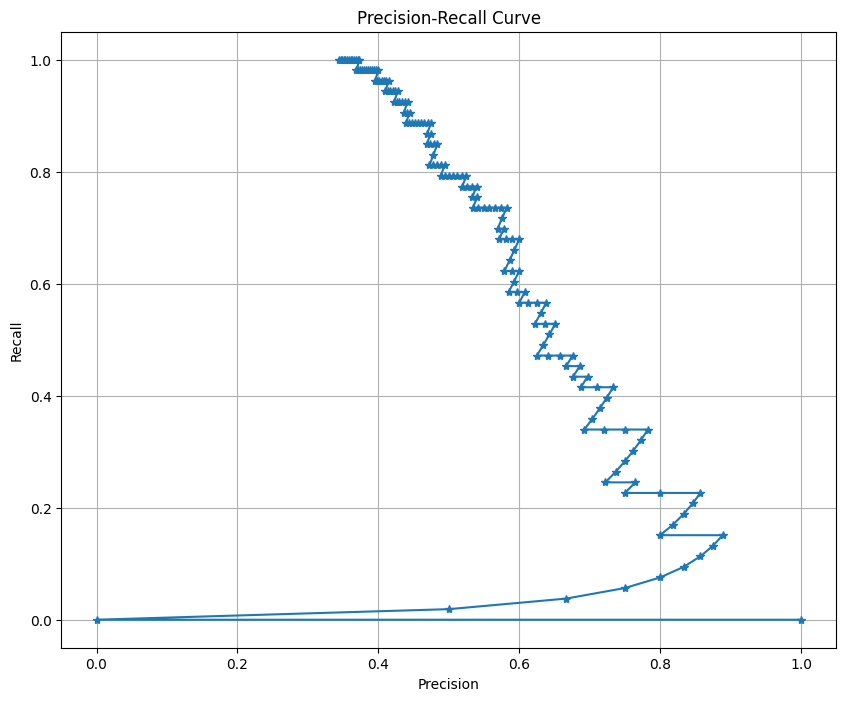

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(precision, recall, marker='*')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [ ]:
y_predicted_probability = model.predict_proba(X_test_set)
log_loss(y_test_set, y_predicted_probability)

23.639019430524886

Problem 2a

In [ ]:
url_cancer = 'https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/cancer.csv'
data_frame1 = pd.read_csv(url_cancer)
# Displaying the first 5 rows of the DataFrame
data_frame1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(data_frame.shape)
print(data_frame.columns)
print(data_frame.dtypes)
print(data_frame.describe)
print(data_frame.isnull().sum())

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           .

In [ ]:
data_frame1 = data_frame1.loc[:, ~data_frame1.columns.isin(['id', 'Unnamed: 32'])]

In [ ]:
data_frame1['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
data_frame1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data_frame1.drop(columns=['diagnosis'])
y = data_frame1['diagnosis']

In [ ]:
import random
random.seed(9)
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X,
                                                   y,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train_set.shape, X_test_set.shape, y_train_set.shape, y_test_set.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train_set)
X_train_scaler = scaler.transform(X_train_set) # standardization of dependent variables
X_train_scaler.shape

(455, 30)

In [ ]:
model = LogisticRegression()

model.fit(X_train_scaler, y_train_set)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.33342475,  0.4461885 ,  0.32479847,  0.39268895,  0.19093623,
        -0.45788195,  0.77907909,  0.87670983, -0.06742526, -0.39141932,
         1.17615197,  0.08288099,  0.71152269,  0.95329884,  0.26832823,
        -0.75023363, -0.13390665,  0.46711148, -0.16408516, -0.74971588,
         0.87459635,  1.05403019,  0.83316693,  0.84350623,  0.79089979,
        -0.02429524,  0.77498924,  0.93971803,  0.80443157,  0.47156781]])

Training Score

In [ ]:
model.score(X_train_scaler, y_train_set)


0.9934065934065934

In [ ]:
X_test_scaler = scaler.transform(X_test_set)
y_predicted = model.predict(X_test_scaler)

In [ ]:
confuse_matrix = confusion_matrix(y_test_set, y_predicted)
confuse_matrix

array([[65,  0],
       [ 3, 46]])

In [ ]:
metrics = [accuracy_score, precision_score, recall_score, f1_score]
results = {}

for metric in metrics:
    result = metric(y_test_set, y_predicted)
    results[metric.__name__] = result

print(results)

{'accuracy_score': 0.9736842105263158, 'precision_score': 1.0, 'recall_score': 0.9387755102040817, 'f1_score': 0.968421052631579}


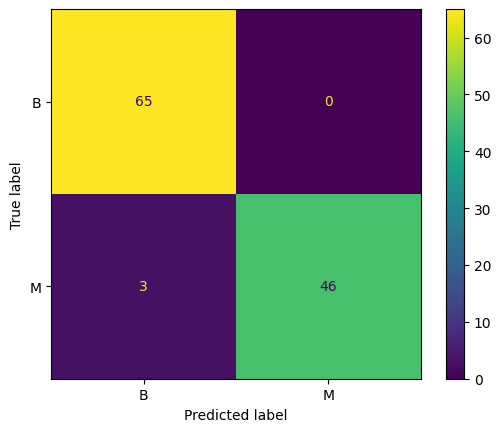

In [ ]:
displaying = ConfusionMatrixDisplay(confusion_matrix = confuse_matrix,
                             display_labels = ['B','M'])
displaying.plot()

In [ ]:
probabilities = model.predict_proba(X_test_scaler)
precision, recall,  thersholds = precision_recall_curve(y_test_set, probabilities[:,1])


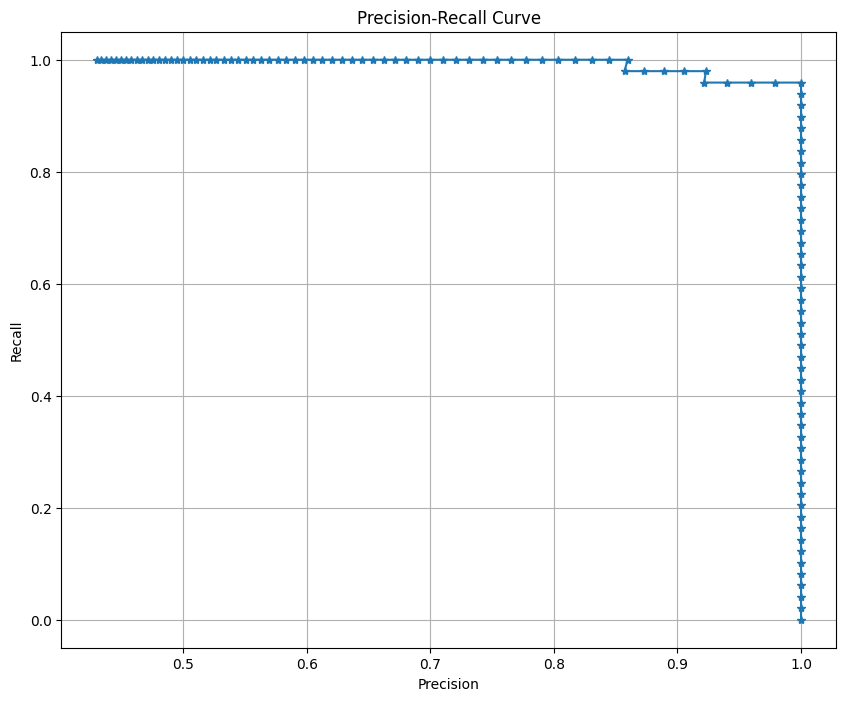

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(precision, recall, marker='*')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()



In [ ]:
y_predicted_probability = model.predict_proba(X_test_set)
log_loss(y_test_set, y_predicted_probability)

20.551205879759774

Problem 2b

Adding Weight Penalty

In [ ]:
C = [30, 3, .3, .003]

for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(X_train_scaler, y_train_set)
    print('C:', c)
    y_predicted = model.predict(X_test_scaler)
    print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
         "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
         "\nRecall Score: ", recall_score(y_test_set, y_predicted),
          "\nF1 Score: ", f1_score(y_test_set, y_predicted))
    print('Training accuracy:', model.score(X_train_scaler, y_train_set))
    print('Test accuracy:', model.score(X_test_scaler, y_test_set))
    print('')


C: 30
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333333
Training accuracy: 0.9956043956043956
Test accuracy: 0.9649122807017544

C: 3
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333333
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

C: 0.3
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383
Training accuracy: 0.9868131868131869
Test accuracy: 0.9649122807017544

C: 0.003
Accuracy Score:  0.5701754385964912 
Precision Score:  0.0 
Recall Score:  0.0 
F1 Score:  0.0
Training accuracy: 0.6417582417582418
Test accuracy: 0.5701754385964912



In [ ]:
C = [30, 3, .3, .003]
for c in C:
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(X_train_scaler, y_train_set)
    print('C:', c)
    print('Coefficients:', model.coef_)
    print('Training accuracy:', model.score(X_train_scaler, y_train_set))
    print('Test accuracy:', model.score(X_test_scaler, y_test_set))
    print('')


C: 30
Coefficients: [[ -9.94739647  -0.11651125   0.           0.          -0.4107769
   -8.60583558   8.66748404   6.07853295  -2.83793665  -2.00180539
    0.          -0.56043041  -0.50907691  34.86380905   0.4104198
    1.04474113  -3.04776779   8.0950895   -2.35539746 -12.43898096
    0.           5.50302617  15.91019447   0.           3.71384245
   -3.40605223   1.21906958   0.           5.31415919  12.36638118]]
Training accuracy: 0.9956043956043956
Test accuracy: 0.9649122807017544

C: 3
Coefficients: [[ 0.          0.          0.          0.          0.         -1.44125942
   0.64659669  1.99093711 -0.17650924 -0.01116452  1.13641493  0.
   0.          5.15361901  0.24543314 -1.15167389  0.          0.80943385
   0.         -1.18916161  0.          1.86604953  3.92951432  0.
   1.06000879  0.          0.819328    1.04338889  1.01674286  0.91637961]]
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

C: 0.3
Coefficients: [[ 0.          0.06152929  0.       

Here, as C decreases, both the training and testing accuracies decreases.This trend is a result of the model's coefficients progressively approaching zero with a lower value of C.

Problem 3

In [ ]:
from sklearn.naive_bayes import GaussianNB

Training Score

In [ ]:
model_naiveBayesian = GaussianNB()
model_naiveBayesian.fit(X_train_scaler, y_train_set)
model_naiveBayesian.score(X_train_scaler, y_train_set)

0.9362637362637363

In [ ]:
y_predicted = model_naiveBayesian.predict(X_test_scaler)
print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
      "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
      "\nRecall Score: ", recall_score(y_test_set, y_predicted),
      "\nF1 Score: ", f1_score(y_test_set, y_predicted))

Accuracy Score:  0.9385964912280702 
Precision Score:  0.9565217391304348 
Recall Score:  0.8979591836734694 
F1 Score:  0.9263157894736843


In [ ]:
confuse_matrix = confusion_matrix(y_test_set, y_predicted)
confuse_matrix


array([[63,  2],
       [ 5, 44]])

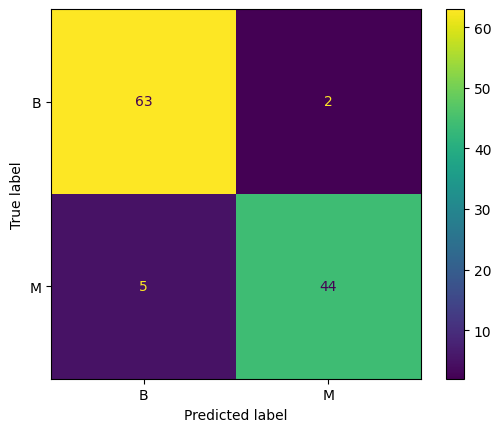

In [ ]:
displaying = ConfusionMatrixDisplay(confusion_matrix = confuse_matrix,
                             display_labels = ['B' , 'M'])
displaying.plot()

In [ ]:
y_predicted_probability = model_naiveBayesian.predict_proba(X_test_set)
log_loss(y_test_set, y_predicted_probability)

20.551205879759774

Problem 4

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler= StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler.shape

(569, 30)

In [ ]:
def pca(percentage):
    pca=PCA(percentage)
    pca.fit(X_scaler)
    xpca=pca.transform(X_scaler)
    return pca.n_components_

In [ ]:
components_list = [(ratio, pca(ratio / 100)) for ratio in range(80, 100, 1)]
for ratio, components in components_list:
    print(f'For the explained variance ratio {ratio}, {components} components retain the information.')

For the explained variance ratio 80, 5 components retain the information.
For the explained variance ratio 81, 5 components retain the information.
For the explained variance ratio 82, 5 components retain the information.
For the explained variance ratio 83, 5 components retain the information.
For the explained variance ratio 84, 5 components retain the information.
For the explained variance ratio 85, 6 components retain the information.
For the explained variance ratio 86, 6 components retain the information.
For the explained variance ratio 87, 6 components retain the information.
For the explained variance ratio 88, 6 components retain the information.
For the explained variance ratio 89, 7 components retain the information.
For the explained variance ratio 90, 7 components retain the information.
For the explained variance ratio 91, 7 components retain the information.
For the explained variance ratio 92, 8 components retain the information.
For the explained variance ratio 93, 9

In [ ]:
pca = PCA()
pca.fit(X_scaler)
maxpca=pca.transform(X_scaler)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

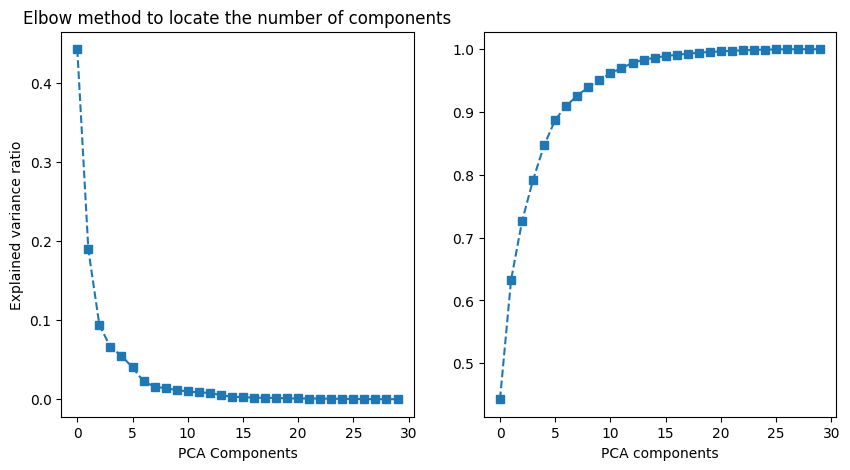

In [ ]:
Explained_variance_ratio=pca.explained_variance_ratio_
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(Explained_variance_ratio,'s--')
plt.xlabel('PCA Components')
plt.ylabel('Explained variance ratio')
plt.title('Elbow method to locate the number of components')

import itertools
curve=list(itertools.accumulate(Explained_variance_ratio))
plt.subplot(1,2,2)
plt.plot(curve,'s--')
plt.xlabel('PCA components')
plt.ylabel

In [ ]:
pca_optimal = PCA(n_components=6)

In [ ]:
pca_optimal.fit(X_scaler)
PCA_principal_Components = pca_optimal.transform(X_scaler)
columns = ['pc' + str(i) for i in range(1, 7)]
principal_DataFrame = pd.DataFrame(data=PCA_principal_Components, columns=columns)
principal_DataFrame.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


In [ ]:
principal_DataFrame['Target'] = y
principal_DataFrame.shape

(569, 7)

In [ ]:
principal_DataFrame.head()

,pc1,pc2,pc3,pc4,pc5,pc6,Target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,1


In [ ]:
X_principal_Components = principal_DataFrame.iloc[:, :-1]  # Assuming 'Target' is the last column
y_principal_Components = principal_DataFrame.iloc[:, -1]

In [ ]:
random.seed(9)
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_principal_Components,
                                                   y_principal_Components,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train_set.shape, X_test_set.shape, y_train_set.shape, y_test_set.shape

((455, 6), (114, 6), (455,), (114,))

In [ ]:
principalComponents_Logistic_Model = LogisticRegression()
principalComponents_Logistic_Model.fit(X_train_set, y_train_set)
principalComponents_Logistic_Model.score(X_train_set, y_train_set)
y_predicted = principalComponents_Logistic_Model.predict(X_test_set)
print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
      "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
      "\nRecall Score: ", recall_score(y_test_set, y_predicted),
      "\nF1 Score: ", f1_score(y_test_set, y_predicted))

Accuracy Score:  0.956140350877193 
Precision Score:  0.9583333333333334 
Recall Score:  0.9387755102040817 
F1 Score:  0.9484536082474228


Problem 5

In [ ]:
principal_NaiveBayesian_Model = GaussianNB()
principal_NaiveBayesian_Model.fit(X_train_set, y_train_set)
principal_NaiveBayesian_Model.score(X_train_set, y_train_set)
y_predicted = principal_NaiveBayesian_Model.predict(X_test_set)
print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
      "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
      "\nRecall Score: ", recall_score(y_test_set, y_predicted),
      "\nF1 Score: ", f1_score(y_test_set, y_predicted))

Accuracy Score:  0.9210526315789473 
Precision Score:  0.9347826086956522 
Recall Score:  0.8775510204081632 
F1 Score:  0.9052631578947369


In [ ]:
for i in range(6, 30, 2):
  pca_optimal = PCA(n_components=i)
  pca_optimal.fit(X_scaler)
  PCA_principal_Components = pca_optimal.transform(X_scaler)
  principal_DataFrame = pd.DataFrame(PCA_principal_Components, columns=[f'pc{j}' for j in range(1, i+1)])
  principal_DataFrame['Target'] = y
  X_principal = principal_DataFrame.drop(columns=['Target'])
  y_principal = principal_DataFrame['Target']
  random.seed(9)
  X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principalComponents_Logistic_Model = LogisticRegression()
  principalComponents_Logistic_Model.fit(X_train_set, y_train_set)
  principalComponents_Logistic_Model.score(X_train_set, y_train_set)
  y_predicted = principalComponents_Logistic_Model.predict(X_test_set)
  print("\nK: ", i)
  print("Maximum ratio: ", np.cumsum(pca_optimal.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
        "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
        "\nRecall Score: ", recall_score(y_test_set, y_predicted),
        "\nF1 Score: ", f1_score(y_test_set, y_predicted))



K:  6
Maximum ratio:  0.887587963564534
Accuracy Score:  0.956140350877193 
Precision Score:  0.9583333333333334 
Recall Score:  0.9387755102040817 
F1 Score:  0.9484536082474228

K:  8
Maximum ratio:  0.9259825386216975
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333333

K:  10
Maximum ratio:  0.9515688143351372
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383

K:  12
Maximum ratio:  0.9700713832182851
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383

K:  14
Maximum ratio:  0.9833502905462594
Accuracy Score:  0.9736842105263158 
Precision Score:  1.0 
Recall Score:  0.9387755102040817 
F1 Score:  0.968421052631579

K:  16
Maximum ratio:  0.98915021607929
Accuracy Score:  0.9736842105263158 
Precision Score:  1.0 
Recall Score:  0.9387755102040817 

In [ ]:
for i in range(6, 30, 2):
  pca_optimal = PCA(n_components=i)
  pca_optimal.fit(X_scaler)
  PCA_principal_Components = pca_optimal.transform(X_scaler)
  principal_DataFrame = pd.DataFrame(PCA_principal_Components, columns=[f'pc{j}' for j in range(1, i+1)])
  principal_DataFrame['Target'] = y
  X_principal = principal_DataFrame.drop(columns=['Target'])
  y_principal = principal_DataFrame['Target']
  random.seed(9)
  X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principalComponents_NaiveBayesian_Model = GaussianNB()
  principalComponents_NaiveBayesian_Model.fit(X_train_set, y_train_set)
  principalComponents_NaiveBayesian_Model.score(X_train_set, y_train_set)
  y_predicted = principalComponents_NaiveBayesian_Model.predict(X_test_set)
  print("\nK: ", i)
  print("Maximum ratio: ", np.cumsum(pca_optimal.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
        "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
        "\nRecall Score: ", recall_score(y_test_set, y_predicted),
        "\nF1 Score: ", f1_score(y_test_set, y_predicted))


K:  6
Maximum ratio:  0.8875879635665722
Accuracy Score:  0.9210526315789473 
Precision Score:  0.9347826086956522 
Recall Score:  0.8775510204081632 
F1 Score:  0.9052631578947369

K:  8
Maximum ratio:  0.9259825386961885
Accuracy Score:  0.9122807017543859 
Precision Score:  0.9534883720930233 
Recall Score:  0.8367346938775511 
F1 Score:  0.8913043478260869

K:  10
Maximum ratio:  0.9515688143340075
Accuracy Score:  0.9122807017543859 
Precision Score:  0.9534883720930233 
Recall Score:  0.8367346938775511 
F1 Score:  0.8913043478260869

K:  12
Maximum ratio:  0.9700713832070302
Accuracy Score:  0.9035087719298246 
Precision Score:  0.9523809523809523 
Recall Score:  0.8163265306122449 
F1 Score:  0.8791208791208791

K:  14
Maximum ratio:  0.9833502905437757
Accuracy Score:  0.9035087719298246 
Precision Score:  0.9523809523809523 
Recall Score:  0.8163265306122449 
F1 Score:  0.8791208791208791

K:  16
Maximum ratio:  0.9891502160782708
Accuracy Score:  0.9035087719298246 
Precisi